<a href="https://colab.research.google.com/github/dkeitley/dev-neuro-brainspan/blob/master/dev_neuro_with_brainspan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develpmental Neurobiology with BrainSpan

## Package Installation

In [1]:
!pip install allensdk

## Helper Functions

In [0]:
from allensdk.api.queries.image_download_api import ImageDownloadApi
from allensdk.api.queries.svg_api import SvgApi
from allensdk.config.manifest import Manifest

import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd

import logging
import os
from base64 import b64encode

from IPython.display import HTML, display
%matplotlib inline


In [0]:
def verify_image(file_path, figsize=(9, 11)):
    image = imread(file_path)

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(image)
    
    
def verify_svg(file_path, width_scale, height_scale):
    # we're using this function to display scaled svg in the rendered notebook.
    # we suggest that in your own work you use a tool such as inkscape or illustrator to view svg
    
    with open(file_path, 'rb') as svg_file:
        svg = svg_file.read()
    encoded_svg = b64encode(svg)
    decoded_svg = encoded_svg.decode('ascii')
    
    st = r'<img class="figure" src="data:image/svg+xml;base64,{}" width={}% height={}%></img>'.format(decoded_svg, width_scale, height_scale)
    display(HTML(st))

In [0]:
image_api = ImageDownloadApi()
svg_api = SvgApi()

In [35]:
atlas_image_id = 138322603
image_api.download_atlas_image(atlas_image_id, "annotation", annotation=True, downsample=3)
verify_image(file_path)


2018-12-08 22:56:20,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/atlas_image_download/138322603?downsample=3&annotation=true
2018-12-08 22:56:20,994 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file annotation from http://api.brain-map.org/api/v2/atlas_image_download/138322603?downsample=3&annotation=true (request).


HTTPError: ignored

# Neurogenesis

In [0]:
pax6_section_id = 100143447
pax6_image_id = 102187868

tbf2_section_id = 100142338
tbf2_image_id = 102166887

downsample = 5
format_str = '.jpg'


In [0]:
def download_section(section_id,section_image_directory):
  section_images = image_api.section_image_query(section_id)
  section_image_ids = [si['id'] for si in section_images]

  logging.getLogger('allensdk.api.api.retrieve_file_over_http').disabled = True

  for section_image_id in section_image_ids:

      file_name = str(section_image_id) + format_str
      file_path = os.path.join(section_image_directory, file_name)

      Manifest.safe_make_parent_dirs(file_path)
      image_api.download_section_image(section_image_id, file_path=file_path, downsample=downsample)

  logging.getLogger('allensdk.api.api.retrieve_file_over_http').disabled = False

In [0]:
download_section(pax6_section_id,"pax6")
download_section(tbf2_section_id,"tbf2")

pax6_file_path = os.path.join("pax6",str(pax6_image_id) + format_str)
tbf2_file_path = os.path.join("tbf2",str(tbf2_image_id) + format_str)



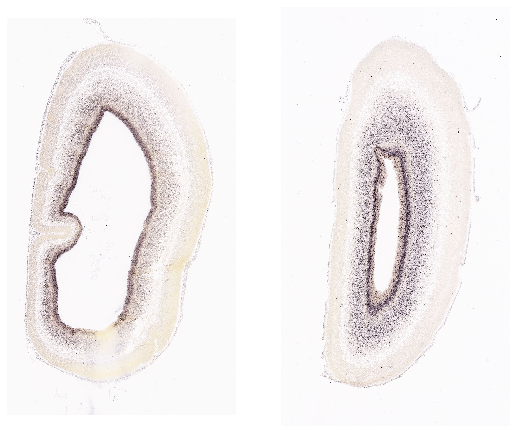

In [31]:

pax6_tbf2_file_paths = [pax6_file_path,tbf2_file_path]

fig, ax = plt.subplots(ncols=2, figsize=(9, 11))
for ii, fp in enumerate(pax6_tbf2_file_paths):
    image = imread(fp)
    ax[ii].imshow(image)
    ax[ii].get_xaxis().set_visible(False)
    ax[ii].get_yaxis().set_visible(False)

25


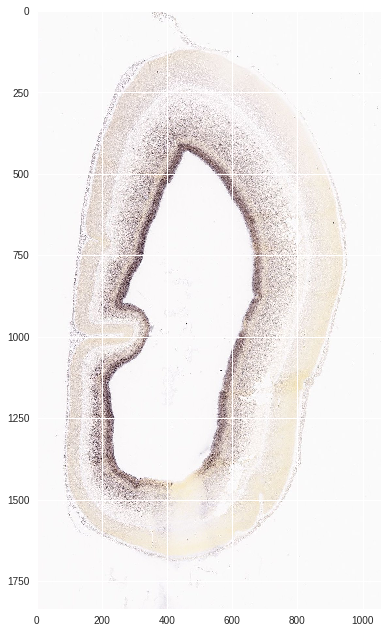

# Cortical Arealisation



1.   Relate brain regions with their caudal-rostral and lateral-medial position
2.   

